In [2]:
import numpy as np
import math as m
import cmath as cm
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly
import spicy
# os.chdir('C:\\Users\\nicol\\Desktop\\pythonfiles\\Wind Turbine\\assignment2')

In [151]:
# DATA
V_cutin = 3
V_rated = 12
Nnom = 22.5
Pnom = 4*10**6
k = Pnom/Nnom**3
N_min = (Nnom/V_rated)*V_cutin

# GENERATOR
p = 52/2
Rg = 14.821*10**-3
Lg = 5.573*10**-3
psi = 15.826

def generator(N, p, Rg, Lg, psi, case):

    fs = N*p/60
    omega = 2*np.pi*fs

    Pmech = k*N**3

    Zg = Rg + 1j*omega*Lg

    Ea = omega*psi
    
    if case=="a":

        # Polynonmial equation
        p = [0]*5
        p[0] = (3*abs(omega*Lg))**2
        p[1] = 0
        p[2] = - (3*abs(Ea))**2
        p[3] = 0
        p[4] = Pmech**2
        roots = np.roots(p)
        #print("roots : ", roots)
        
        Ia=roots[-1]

        Va = Pmech/(3*Ia) - Rg*Ia
        
        angle = np.arccos((Va+Rg*Ia)/Ea)*180/np.pi

    if case=="b":

        Ia = Pmech/(3*Ea)

        Va = Ea - Ia*Zg

        angle = - np.angle(Va,deg=True)

        Ia = cm.rect(Ia,angle*np.pi/180)

    Ea = cm.rect(Ea,angle*np.pi/180)
    Va = cm.rect(abs(Va),0)

    Sa = 3*Va*Ia
    Pa = Sa.real
    Qa = -Sa.imag
    
    Ploss = Pmech - Pa
    efficiency = Pa/Pmech

    # print('Sa = ', Sa, abs(Sa),np.angle(Sa,deg=True))
    # print('Ia = ', Ia, abs(Ia),np.angle(Ia,deg=True))
    # print('Va = ', Va, abs(Va),np.angle(Va,deg=True))
    # print('Zg = ',Zg, abs(Zg), np.angle(Zg,deg=True))
    # print('Ea = ',Ea, abs(Ea), np.angle(Ea,deg=True))

    return([fs,omega,Pmech,Zg,Ia,Va,Ea,angle,Sa,Pa,Qa,Ploss,efficiency])

case_a = generator(Nnom, p, Rg, Lg, psi, "a")
case_b = generator(Nnom, p, Rg, Lg, psi, "b")



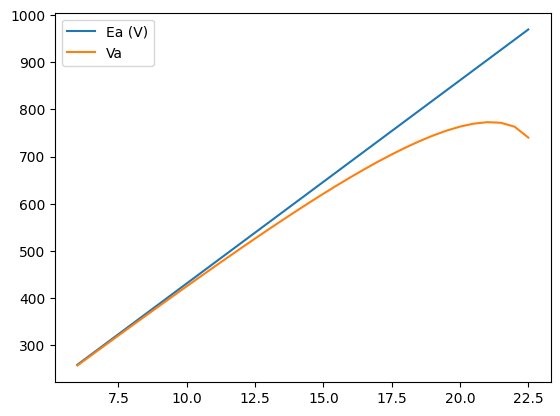

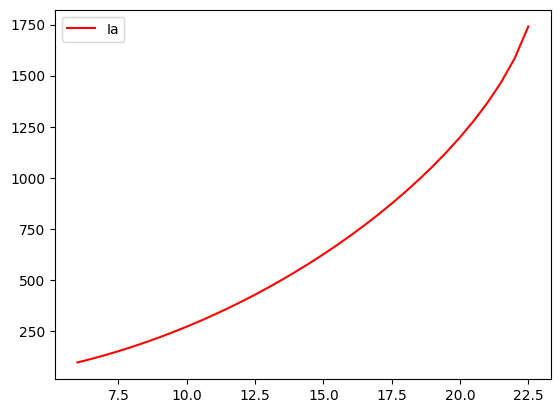

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


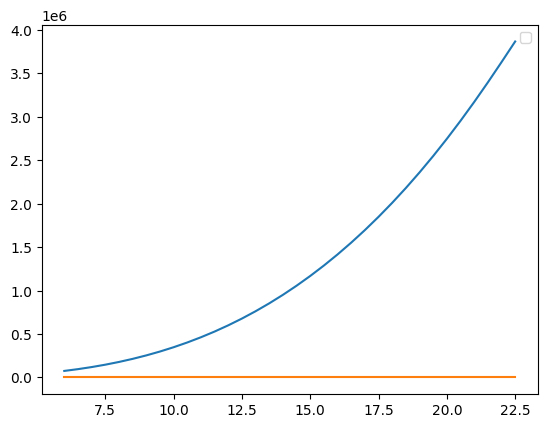

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


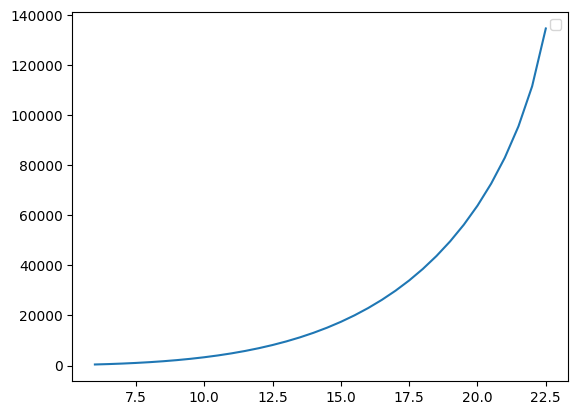

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


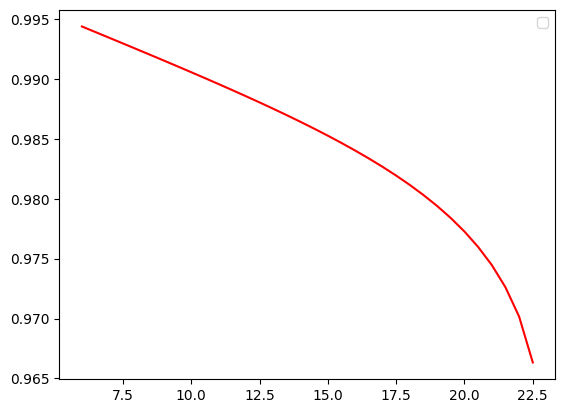

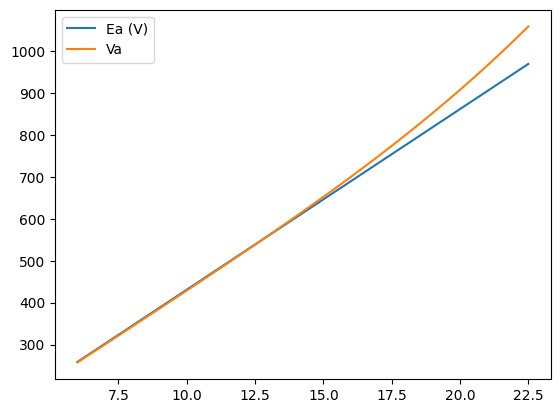

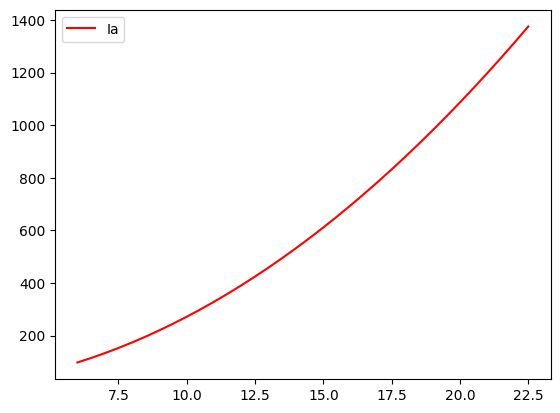

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


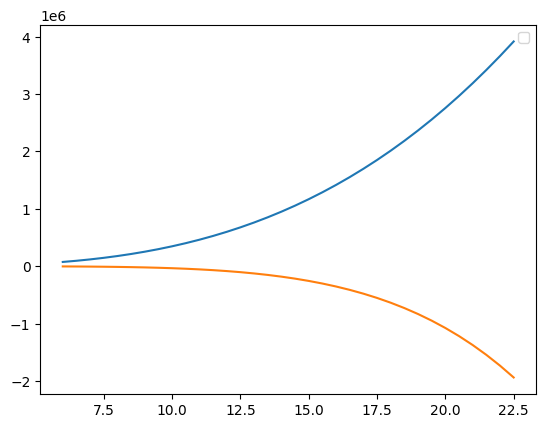

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


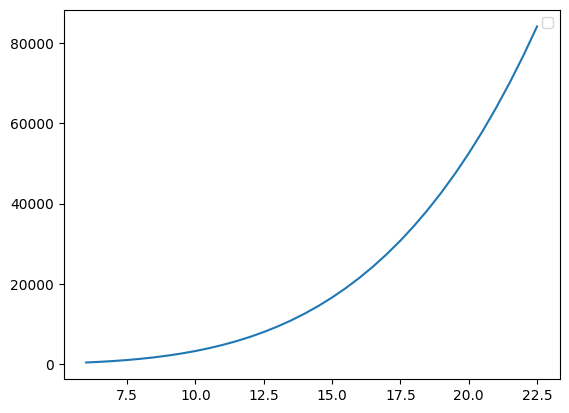

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


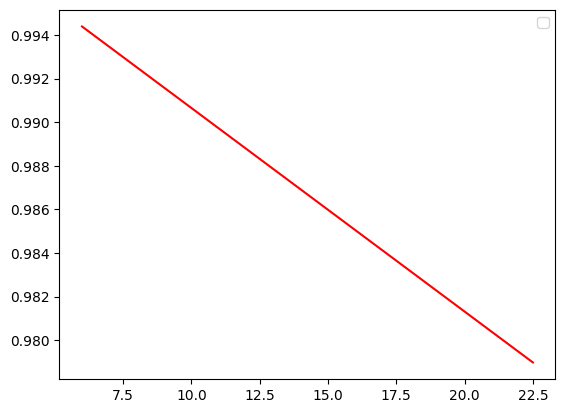

In [170]:
list_N = np.arange(np.ceil(N_min),23,0.5)






for case in ['a','b']:
    data=[]
    for N in list_N :
        data.append([case,N]+generator(N, p, Rg, Lg, psi, case))
    Data = pd.DataFrame(data,columns=['case','N','fs','omega','Pmech','Zg','Ia','Va','Ea','angle','Sa','Pa','Qa','Ploss','efficiency'])
    
    plt.plot(Data["N"],abs(Data["Ea"]),label="Ea (V)")
    plt.plot(Data["N"],abs(Data["Va"]),label="Va")
    plt.legend()
    plt.show()

    plt.plot(Data["N"],abs(Data["Ia"]),label="Ia",color='red')
    plt.legend()
    plt.show()

    plt.plot(Data["N"],Data["Pa"])
    plt.plot(Data["N"],Data["Qa"])
    plt.legend()
    plt.show()

    plt.plot(Data["N"],Data["Ploss"])
    plt.legend()
    plt.show()
    
    plt.plot(Data["N"],Data["efficiency"],'red')
    plt.legend()
    plt.show()

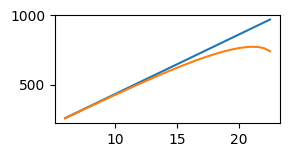

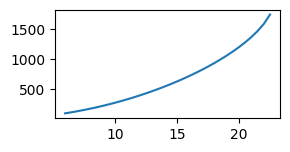

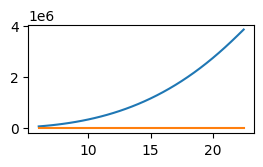

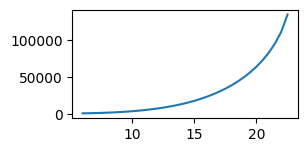

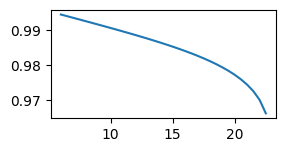